In [45]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

In [148]:
def calculate_z(x, y, smearing=False):
    
    # Gaussian + quadratic relation
    z = 20 + 80*np.exp(-(x-75)**2/30**2) + 0.3 * y + 0.005*y*y

    # Linear relation
    # z = 20 + x + 2*y
    if smearing:
        sig_z = 0.1 + (x + y) / 1000 # Up to 0.3
        z = z + np.random.normal(z, sig_z * z)

    return z

# Inspecting calculate_z by plotting x and y projections

(0.0, 239.07837810765298)

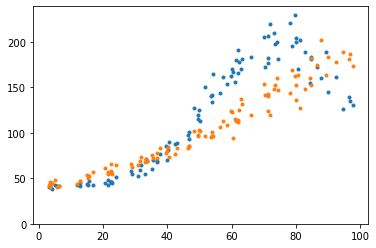

In [149]:
#  z function
data_non_zero = np.random.rand(100) * 100
data_zero = np.zeros(100)

plt.plot(
    data_non_zero,
    calculate_z(data_non_zero, data_zero, smearing=True),
    linestyle='none',
    marker='o',
    markersize=3
)
plt.plot(
    data_non_zero,
    calculate_z(data_zero, data_non_zero, smearing=True),
    linestyle='none',
    marker='o',
    markersize=3
)

ax = plt.gca()
ylim = ax.get_ylim()
ax.set_ylim(0, ylim[1])

# Creating a large dataset

In [150]:
def create_dataset(size):
    data_x = np.random.rand(size) * 100
    data_y = np.random.rand(size) * 100

    data_z = calculate_z(data_x, data_y, smearing=True)

    df = pd.DataFrame({'x': data_x, 'y': data_y, 'z': data_z})
    return df 

In [151]:
# Creating dataset for plotting
data = create_dataset(200_000)
data

,x,y,z
0,75.652097,87.655914,396.837708
1,80.140615,1.966367,235.391438
2,5.478403,64.042842,132.629664
3,62.075659,31.053634,128.170438
4,50.602835,41.425646,179.994256
...,...,...,...
199995,33.028435,10.715510,70.535897
199996,83.492466,61.536948,290.759710
199997,99.478846,33.041166,146.956354
199998,47.552694,35.258024,148.048934


### Plotting data

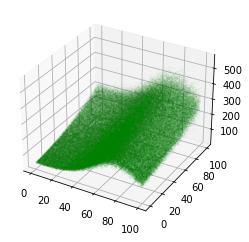

In [152]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(data['x'], data['y'], data['z'], c='g', s=0.001)

## Scaling data

In [153]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()  
# # Don't cheat - fit only on training data
# scaler.fit(X_train)  
# X_train = scaler.transform(X_train)  
# # apply same transformation to test data
# X_test = scaler.transform(X_test)  

# MLP Regression

In [154]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [155]:
features = np.array(data[['x', 'y']])
target = np.array(data[['z']])
target = np.ravel(target)
features_train, features_test, target_train, target_test = train_test_split(
    features,
    target,
    random_state=1
)

In [156]:
reg = MLPRegressor(
    hidden_layer_sizes=(6, 6),
    activation="relu",
    random_state=1,
    max_iter=2000
).fit(features_train, target_train)

In [157]:
pred_test = reg.predict(features_test)

Abs: -0.274 +/- 22.9
Rel: 0.0108 +/- 0.115


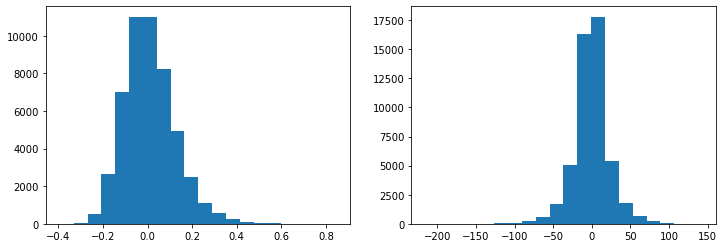

In [158]:
abs_deviation = (pred_test - target_test)
rel_deviation = abs_deviation / target_test

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.hist(rel_deviation, bins=20)
ax2.hist(abs_deviation, bins=20)

mean_abs = np.mean(abs_deviation)
std_abs = np.std(abs_deviation)
print('Abs: {:.3} +/- {:.3}'.format(mean_abs, std_abs))

mean_rel = np.mean(rel_deviation)
std_rel = np.std(rel_deviation)
print('Rel: {:.3} +/- {:.3}'.format(mean_rel, std_rel))


Text(0.5, 0, 'y')

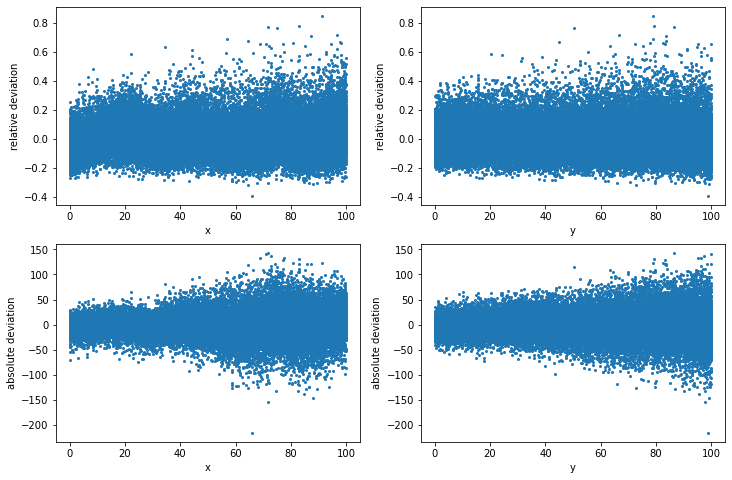

In [159]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))

ms = 2
mm = 'o'

ax1.plot(
    features_test[:,0],
    rel_deviation,
    linestyle='none',
    marker=mm,
    markersize=ms
)
ax1.set_ylabel('relative deviation')
ax1.set_xlabel('x')

ax2.plot(
    features_test[:,1],
    rel_deviation,
    linestyle='none',
    marker=mm,
    markersize=ms
)
ax2.set_ylabel('relative deviation')
ax2.set_xlabel('y')

ax3.plot(
    features_test[:,0],
    abs_deviation,
    linestyle='none',
    marker=mm,
    markersize=ms
)
ax3.set_ylabel('absolute deviation')
ax3.set_xlabel('x')

ax4.plot(
    features_test[:,1],
    abs_deviation,
    linestyle='none',
    marker=mm,
    markersize=ms
)
ax4.set_ylabel('absolute deviation')
ax4.set_xlabel('y')

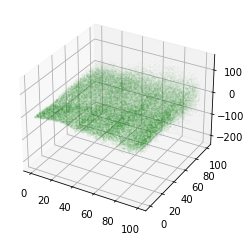

In [160]:
features_test[:,0]
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(features_test[:,0], features_test[:,1], abs_deviation, c='g', s=0.001)

In [103]:
score = reg.score(features_test, target_test)
score

0.7899741696606737